In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [15]:
tsv_1_path = 'https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data1.tsv'
tsv_2_path = 'https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data2.tsv'
tsv_3_path = 'https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data3.tsv'
tsv_4_path = 'https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data4.tsv'

def read_tsv(url):
    return pd.read_csv(url, sep='\t', names=['x', 'y'])

data_1 = read_tsv(tsv_1_path)
data_2 = read_tsv(tsv_2_path)
data_3 = read_tsv(tsv_3_path)
data_4 = read_tsv(tsv_4_path)

data_list = [data_1, data_2, data_3, data_4]

In [49]:
def calculate_statistic(data_list, function, precision):
    for index, dataframe in enumerate(data_list):
        for column in dataframe.columns:
            print("dataframe_{index}['{column}'] — {value:10.{precision}f}".format(
                index=index, column=column, value=function(dataframe[column]), precision=precision))

In [50]:
calculate_statistic(data_list, np.mean, 2)

dataframe_0['x'] —       9.00
dataframe_0['y'] —       7.50
dataframe_1['x'] —       9.00
dataframe_1['y'] —       7.50
dataframe_2['x'] —       9.00
dataframe_2['y'] —       7.50
dataframe_3['x'] —       9.00
dataframe_3['y'] —       7.50


In [51]:
calculate_statistic(data_list, np.var, 3)

dataframe_0['x'] —     10.000
dataframe_0['y'] —      3.752
dataframe_1['x'] —     10.000
dataframe_1['y'] —      3.752
dataframe_2['x'] —     10.000
dataframe_2['y'] —      3.748
dataframe_3['x'] —     10.000
dataframe_3['y'] —      3.748


In [55]:
def calculate_pearson(data_list):
    for index, dataframe in enumerate(data_list):
        tup = stats.pearsonr(dataframe['x'], dataframe['y'])
        print('dataframe_{} – {:10.3f} {:10.3f}'.format(index, tup[0], tup[1]))
        
calculate_pearson(data_list)

dataframe_0 –      0.816      0.002
dataframe_1 –      0.816      0.002
dataframe_2 –      0.816      0.002
dataframe_3 –      0.817      0.002


In [71]:
def calculate_linear_regression(data_list):
    results = []
    for index, dataframe in enumerate(data_list):
        slope, intercept, r_value, p_value, std_err = stats.linregress(dataframe['x'], dataframe['y'])
        print('dataframe_{} – a = {:10.2f}, b = {:10.2f}'.format(index, slope, intercept))
        results.append((slope, intercept))
    return results
        
linear_regression_results = calculate_linear_regression(data_list)

dataframe_0 – a =       0.50, b =       3.00
dataframe_1 – a =       0.50, b =       3.00
dataframe_2 – a =       0.50, b =       3.00
dataframe_3 – a =       0.50, b =       3.00


In [83]:
def calculate_polyval(linear_regression_results, x):
    m, b = linear_regression_results[0]
    yp = np.polyval([m, b], x)
    return yp

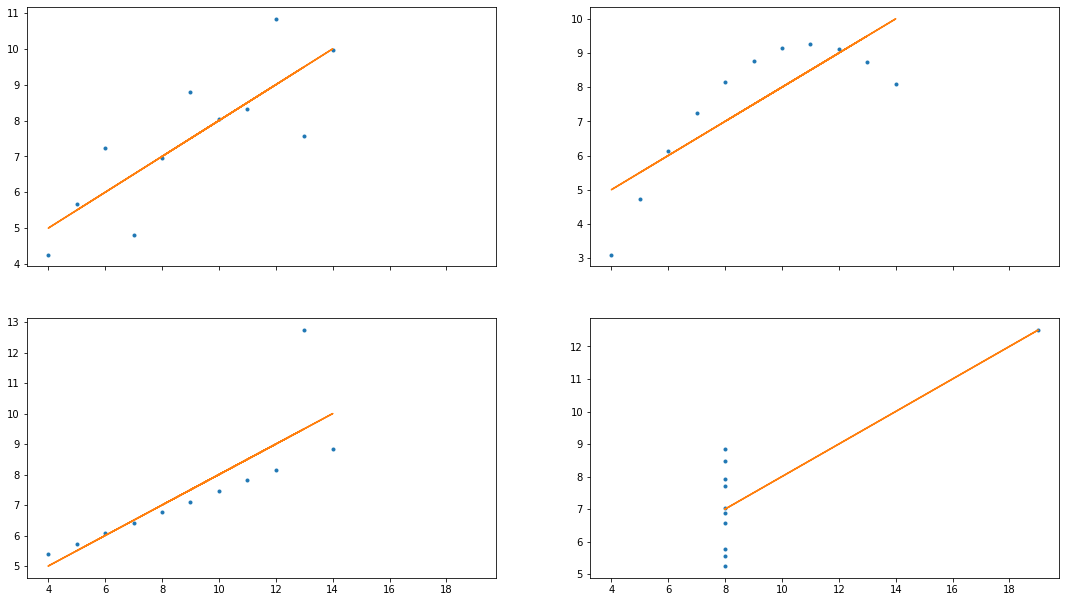

In [89]:
def plot_plots(data_list, linear_regression_results):
    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
    fig.set_size_inches(18.5, 10.5)
    order = [(0, 0), (0, 1), (1, 0), (1, 1)]
    
    for index, loc in enumerate(order):
        ax[loc[0], loc[1]].plot(data_list[index]['x'], data_list[index]['y'], '.')
        yp = calculate_polyval(linear_regression_results, data_list[index]['x'])
        ax[loc[0], loc[1]].plot(data_list[index]['x'], yp)

    plt.show()
    
plot_plots(data_list, linear_regression_results)